## Importing Libraries & Loading Data sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
train = pd.read_csv('/kaggle/input/predicting-the-sales-of-products-of-a-retail-chain/train_data.csv')
test = pd.read_csv('/kaggle/input/predicting-the-sales-of-products-of-a-retail-chain/test_data.csv')
date_week = pd.read_csv('/kaggle/input/predicting-the-sales-of-products-of-a-retail-chain/date_to_week_id_map.csv')
product = pd.read_csv('/kaggle/input/predicting-the-sales-of-products-of-a-retail-chain/product_prices.csv')

In [3]:
train.head()


,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [4]:
test.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     15500 non-null  int64 
 1   date                   15500 non-null  object
 2   product_identifier     15500 non-null  int64 
 3   department_identifier  15500 non-null  int64 
 4   category_of_product    15500 non-null  object
 5   outlet                 15500 non-null  int64 
 6   state                  15500 non-null  object
dtypes: int64(4), object(3)
memory usage: 847.8+ KB


In [6]:
date_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     821 non-null    object
 1   week_id  821 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [7]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   outlet              59000 non-null  int64  
 1   product_identifier  59000 non-null  int64  
 2   week_id             59000 non-null  int64  
 3   sell_price          59000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.8 MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     15500 non-null  int64 
 1   date                   15500 non-null  object
 2   product_identifier     15500 non-null  int64 
 3   department_identifier  15500 non-null  int64 
 4   category_of_product    15500 non-null  object
 5   outlet                 15500 non-null  int64 
 6   state                  15500 non-null  object
dtypes: int64(4), object(3)
memory usage: 847.8+ KB


In [9]:
train.shape

(395000, 7)

In [10]:
test.shape

(15500, 7)

In [11]:
date_week.shape

(821, 2)

In [12]:
product.shape

(59000, 4)

#### Merging Datasets 

In [13]:
# using inner merge function to merge product and date_week dataset on basis of week_id as it is common between them

df1=pd.merge(product,date_week, on=['week_id'], how='inner')

In [14]:
df1.head()

,outlet,product_identifier,week_id,sell_price,date
0,111,74,49,2.94,2012-01-01
1,111,74,49,2.94,2012-01-02
2,111,74,49,2.94,2012-01-03
3,111,74,49,2.94,2012-01-04
4,111,74,49,2.94,2012-01-05


In [15]:
df1.shape

(410500, 5)

In [16]:
# using inner merge function to merge train and df1 dataset on basis of date, product_identifier and outlet as it is common between them

df=pd.merge(train,df1, on=['date','product_identifier','outlet'], how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   395000 non-null  object 
 1   product_identifier     395000 non-null  int64  
 2   department_identifier  395000 non-null  int64  
 3   category_of_product    395000 non-null  object 
 4   outlet                 395000 non-null  int64  
 5   state                  395000 non-null  object 
 6   sales                  395000 non-null  int64  
 7   week_id                395000 non-null  int64  
 8   sell_price             395000 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 30.1+ MB


In [17]:
# getting random sample from the mearged dataset

df.sample(5)

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
288519,2013-07-31,1196,22,fast_moving_consumer_goods,111,Maharashtra,0,131,5.94
298187,2013-08-19,1753,31,drinks_and_food,114,Maharashtra,14,134,1.97
226892,2013-03-29,2794,33,drinks_and_food,331,Kerala,0,113,4.38
34715,2012-03-10,1054,21,fast_moving_consumer_goods,221,Telangana,5,59,2.97
200771,2013-02-05,1240,22,fast_moving_consumer_goods,222,Telangana,1,106,6.46


In [18]:
# using inner merge function to merge test_data and df1 dataset on basis of date, product_identifier and outlet 
# as it is common between them

test_data = pd.merge(test,df1, on=['date','product_identifier','outlet'], how='inner')

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15500 entries, 0 to 15499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15500 non-null  int64  
 1   date                   15500 non-null  object 
 2   product_identifier     15500 non-null  int64  
 3   department_identifier  15500 non-null  int64  
 4   category_of_product    15500 non-null  object 
 5   outlet                 15500 non-null  int64  
 6   state                  15500 non-null  object 
 7   week_id                15500 non-null  int64  
 8   sell_price             15500 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 1.2+ MB


In [20]:
# getting random sample from the mearged dataset

df.sample(5)

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
118230,2012-08-24,1542,22,fast_moving_consumer_goods,221,Telangana,0,82,24.92
277335,2013-07-08,1694,31,drinks_and_food,223,Telangana,0,128,1.97
236036,2013-04-17,1727,31,drinks_and_food,111,Maharashtra,0,116,2.24
129704,2012-09-16,581,21,fast_moving_consumer_goods,221,Telangana,1,86,4.87
292827,2013-08-08,1424,22,fast_moving_consumer_goods,223,Telangana,0,132,6.97


### Gathering information about the dataset 

In [21]:
df.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales', 'week_id',
       'sell_price'],
      dtype='object')

In [22]:
# getting all the details of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   395000 non-null  object 
 1   product_identifier     395000 non-null  int64  
 2   department_identifier  395000 non-null  int64  
 3   category_of_product    395000 non-null  object 
 4   outlet                 395000 non-null  int64  
 5   state                  395000 non-null  object 
 6   sales                  395000 non-null  int64  
 7   week_id                395000 non-null  int64  
 8   sell_price             395000 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 30.1+ MB


In [23]:
df.shape

(395000, 9)

In [24]:
# Finding null values

df.isnull().sum()

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
week_id                  0
sell_price               0
dtype: int64

    we can see that there is no null value present

In [25]:
# finding unique values in each columns

df.nunique()

date                     790
product_identifier        50
department_identifier      6
category_of_product        3
outlet                    10
state                      3
sales                    126
week_id                  113
sell_price               107
dtype: int64

In [26]:
##.	Explore the data types of each column.
df.dtypes

date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
week_id                    int64
sell_price               float64
dtype: object

In [27]:
# Checking Duplicate rows

df.duplicated().sum()

0

    there is no duplicate row present

In [28]:
df.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales', 'week_id',
       'sell_price'],
      dtype='object')

## Data Visualization 

In [29]:
##converting  datatype from object as category
col = ['category_of_product', 'state']
df[col] = df[col].astype('category')

In [30]:
##e.	Understand if all the columns are in appropriate datatypes or not.
df.dtypes

date                       object
product_identifier          int64
department_identifier       int64
category_of_product      category
outlet                      int64
state                    category
sales                       int64
week_id                     int64
sell_price                float64
dtype: object

### Univariate analysis For Categorical values

#### For column category of product 

In [31]:
df["category_of_product"].unique()

['others', 'fast_moving_consumer_goods', 'drinks_and_food']
Categories (3, object): ['drinks_and_food', 'fast_moving_consumer_goods', 'others']

In [32]:
print("Total no of product sold form each category counts are :")

df["category_of_product"].value_counts().to_frame().style.background_gradient(cmap='copper')

Total no of product sold form each category counts are :


,category_of_product
fast_moving_consumer_goods,229100
drinks_and_food,134300
others,31600


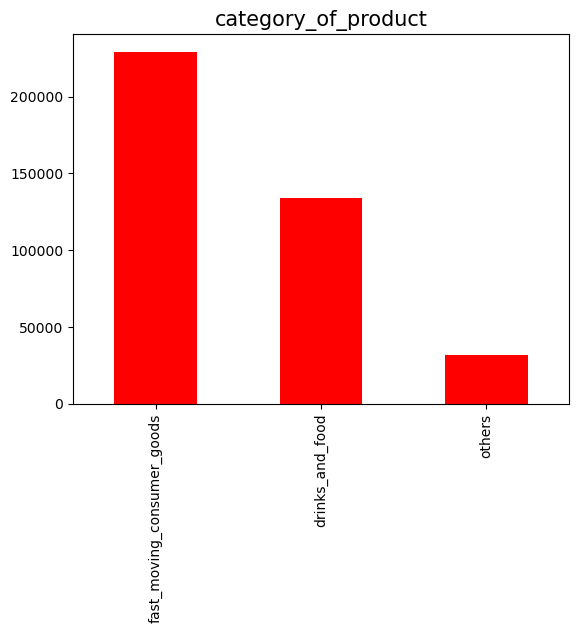

In [33]:
df["category_of_product"].value_counts().plot(kind = "bar",cmap='flag')
plt.title('category_of_product',fontsize=15)
plt.show()

    From this visuals we can see that fast_moving_consumer_goods has the maximum no of product sold  with 229100 followed by drinks_and_food

#### For column State :- 

In [34]:
df["state"].nunique()

3

In [35]:
df["state"].unique()

['Maharashtra', 'Telangana', 'Kerala']
Categories (3, object): ['Kerala', 'Maharashtra', 'Telangana']

In [36]:
print("Total no of product sold form each state counts are :")

df["state"].value_counts().to_frame().style.background_gradient(cmap='copper')

Total no of product sold form each state counts are :


,state
Maharashtra,158000
Kerala,118500
Telangana,118500


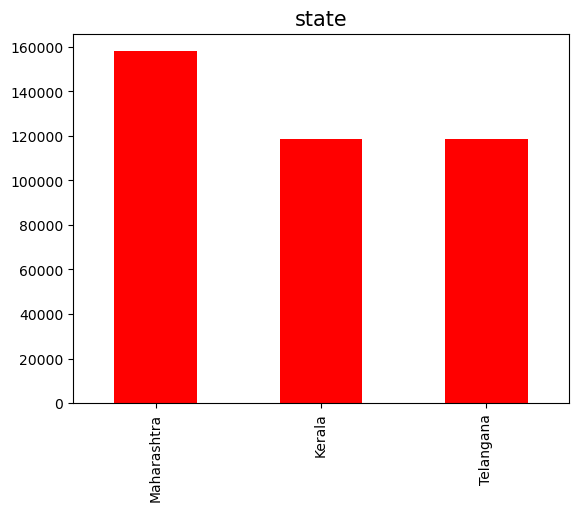

In [37]:
df["state"].value_counts().plot(kind = "bar",cmap='flag')
plt.title('state',fontsize=15)
plt.show()

From this visuals we can see that Maharashtra has the maximum no of product sold  with 15800 followed by Telangana and Kerala with same no

### Univariate analysis For Numerical Features 

In [38]:
# getting description about the numerical features

df.describe()

,product_identifier,department_identifier,outlet,sales,week_id,sell_price
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,105.070886,4.987644
std,809.799518,6.337863,91.161291,3.595266,32.578749,3.874444
min,74.000000,11.000000,111.000000,0.000000,49.000000,0.050000
25%,926.000000,21.000000,113.000000,0.000000,77.000000,2.680000
50%,1325.000000,22.000000,221.500000,0.000000,105.000000,3.980000
75%,1753.000000,31.000000,331.000000,1.000000,133.000000,6.480000
max,3021.000000,33.000000,333.000000,293.000000,161.000000,44.360000


####  For 	product_identifier :-

<AxesSubplot:xlabel='product_identifier', ylabel='Density'>

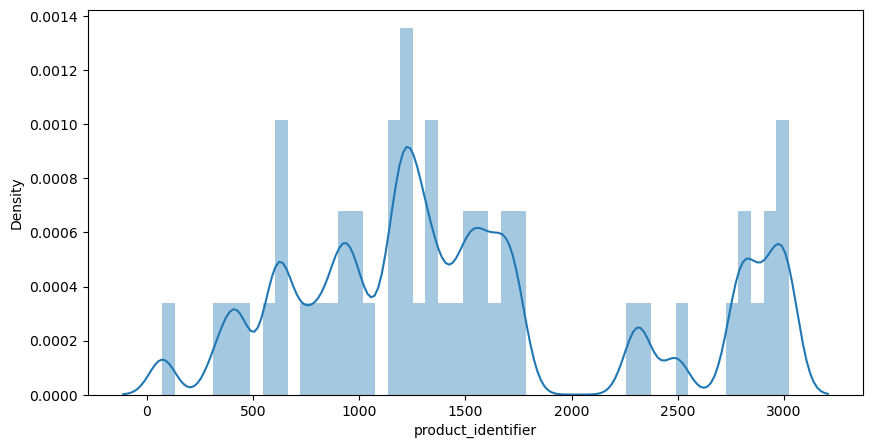

In [39]:
#checking the distribution of data

plt.figure(figsize = (10,5))
sns.distplot(df['product_identifier'])

<AxesSubplot:>

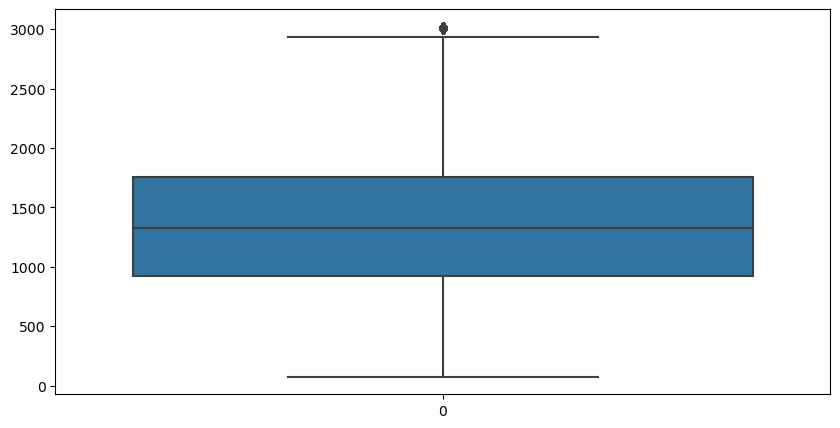

In [40]:
# Finding outliers trough graph

plt.figure(figsize = (10,5))
sns.boxplot(df['product_identifier'])

    From this visual we can see that there is outlaies present

In [41]:
## calculating inter quantile range
Q3 = df.product_identifier.quantile(0.75)
Q1 = df.product_identifier.quantile(0.25)
IQR = Q3 - Q1
IQR

827.0

In [42]:
# Above Upper bound

upper=Q3+1.5*IQR
upper_array=np.array(df['product_identifier']>=upper)
print("Upper Bound:",upper)

#Below Lower bound

lower=Q1-1.5*IQR
lower_array=np.array(df['product_identifier']<=lower)
print("Lower Bound:",lower)

Upper Bound: 2993.5
Lower Bound: -314.5


In [43]:
# Replacing outliers with null values

df['product_identifier'] = np.where(df['product_identifier']>=3000, np.nan, df['product_identifier'])

In [44]:
df['product_identifier'].isnull().sum()

23700

#### For  department_identifier :-

<AxesSubplot:xlabel='department_identifier', ylabel='Density'>

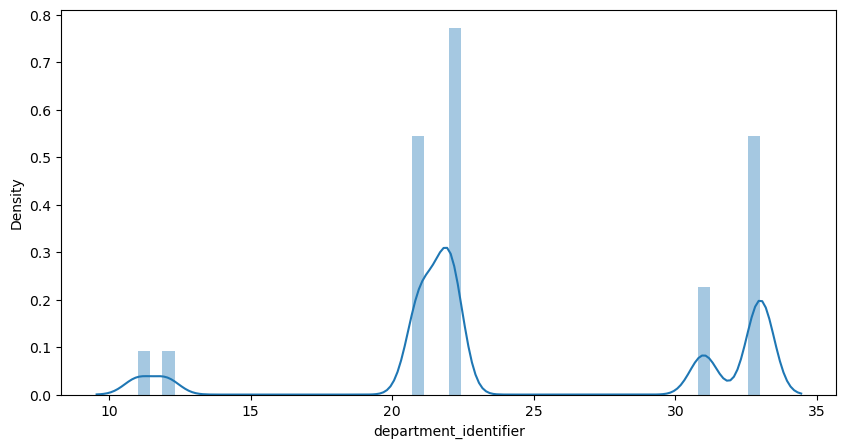

In [45]:
#checking the distribution of data

plt.figure(figsize = (10,5))
sns.distplot(df['department_identifier'])

<AxesSubplot:>

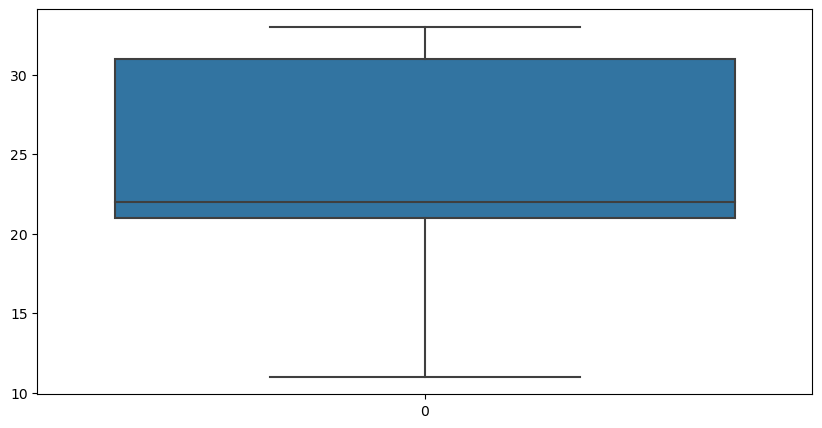

In [46]:
# Finding outliers trough graph

plt.figure(figsize = (10,5))
sns.boxplot(df['department_identifier'])

    From this visual we can see that there is no outliers present

#### For  outlet :-

<AxesSubplot:xlabel='outlet', ylabel='Density'>

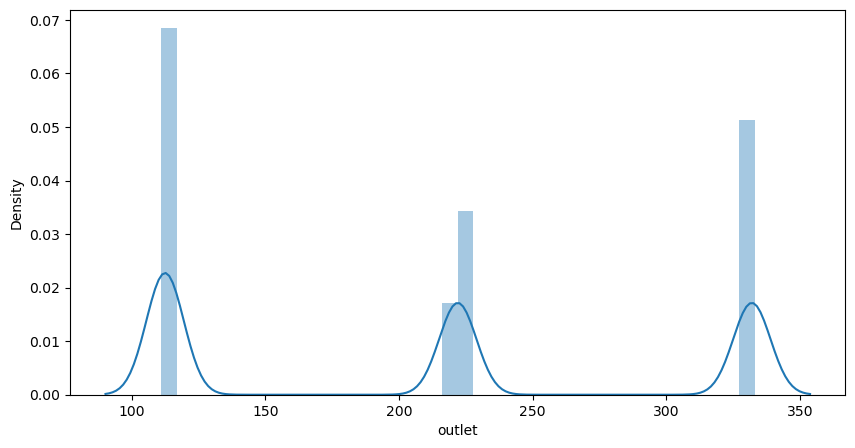

In [47]:
#checking the distribution of data

plt.figure(figsize = (10,5))
sns.distplot(df['outlet'])

<AxesSubplot:>

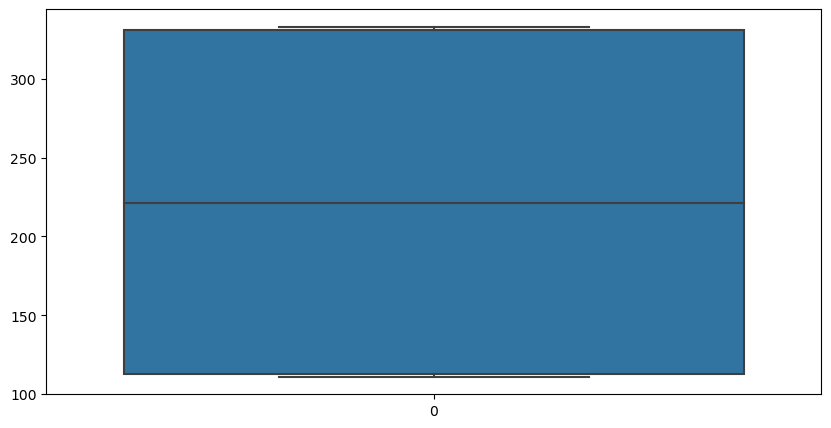

In [48]:
# Finding outliers trough graph

plt.figure(figsize = (10,5))
sns.boxplot(df['outlet'])

    From this visual we can see that there is no outliers present

#### For  sales :-

<AxesSubplot:xlabel='sales', ylabel='Density'>

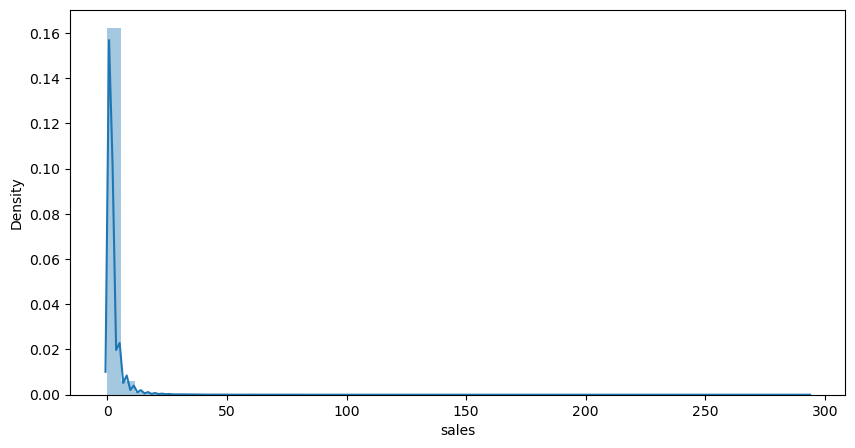

In [49]:
#checking the distribution of data

plt.figure(figsize = (10,5))
sns.distplot(df['sales'])

<AxesSubplot:>

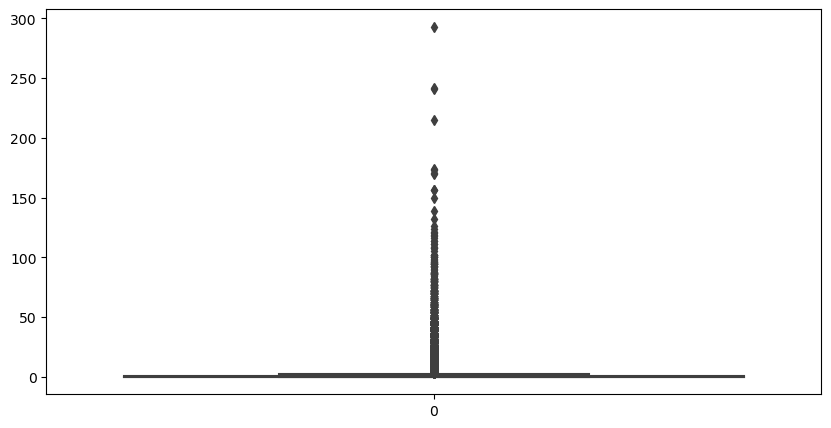

In [50]:
# Finding outliers trough graph

plt.figure(figsize = (10,5))
sns.boxplot(df['sales'])

    From this visual we can see that there is outliers present

In [51]:
## calculating inter quantile range
Q3 = df.sales.quantile(0.75)
Q1 = df.sales.quantile(0.25)
IQR = Q3 - Q1
IQR

1.0

In [52]:
# Above Upper bound

upper=Q3+1.5*IQR
upper_array=np.array(df['sales']>=upper)
print("Upper Bound:",upper)

#Below Lower bound

lower=Q1-1.5*IQR
lower_array=np.array(df['sales']<=lower)
print("Lower Bound:",lower)


Upper Bound: 2.5
Lower Bound: -1.5


In [53]:
# Replacing outliers with null values

df['sales'] = np.where(df['sales']>=2.5, np.nan, df['sales'])

In [54]:
df['sales'].isnull().sum()

54131

#### For  sell_price :-

<AxesSubplot:xlabel='sell_price', ylabel='Density'>

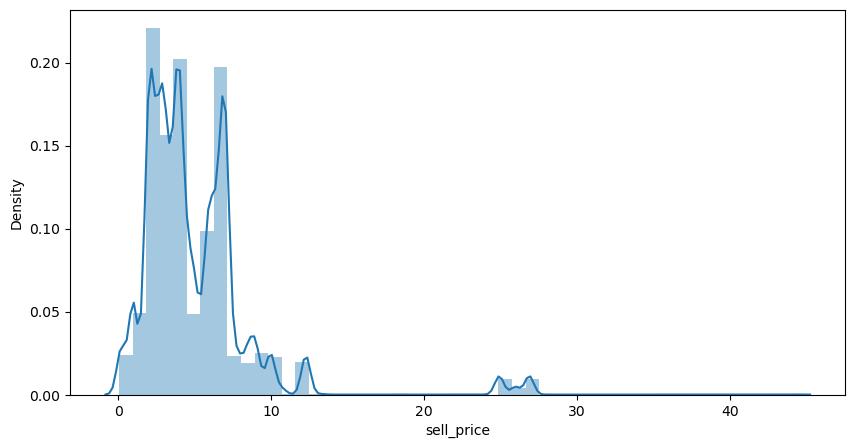

In [55]:
#checking the distribution of data

plt.figure(figsize = (10,5))
sns.distplot(df['sell_price'])

<AxesSubplot:>

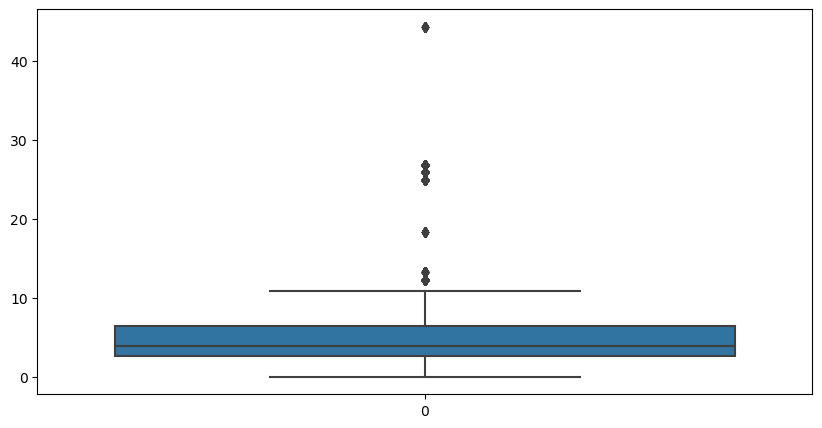

In [56]:
# Finding outliers trough graph

plt.figure(figsize = (10,5))
sns.boxplot(df['sell_price'])

In [57]:
## calculating inter quantile range
Q3 = df.sell_price.quantile(0.75)
Q1 = df.sell_price.quantile(0.25)
IQR = Q3 - Q1
IQR

3.8000000000000003

In [58]:
# Above Upper bound

upper=Q3+1.5*IQR
upper_array=np.array(df['sell_price']>=upper)
print("Upper Bound:",upper)

#Below Lower bound

lower=Q1-1.5*IQR
lower_array=np.array(df['sell_price']<=lower)
print("Lower Bound:",lower)

Upper Bound: 12.18
Lower Bound: -3.02


In [59]:
# Replacing outliers with null values

df['sell_price'] = np.where(df['sell_price']>=12.5, np.nan, df['sell_price'])

In [60]:
df['sell_price'].isnull().sum()

8018

###  Bivariate analysis with target variable

In [61]:
##check for insights using scatterplot
def scatter(df, column):
    plt.figure()
    plt.scatter(df[column] , df['sales'])
    plt.ylabel('sales')
    plt.xlabel(column)

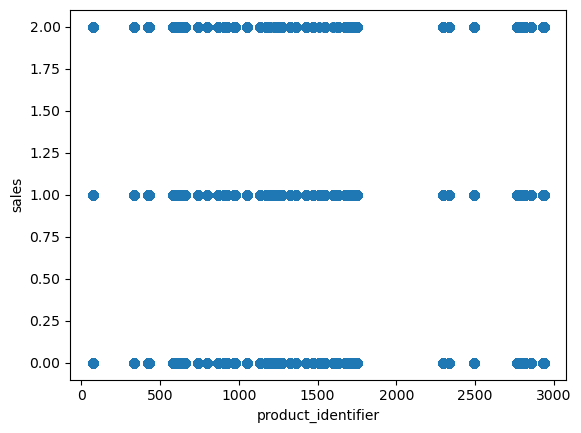

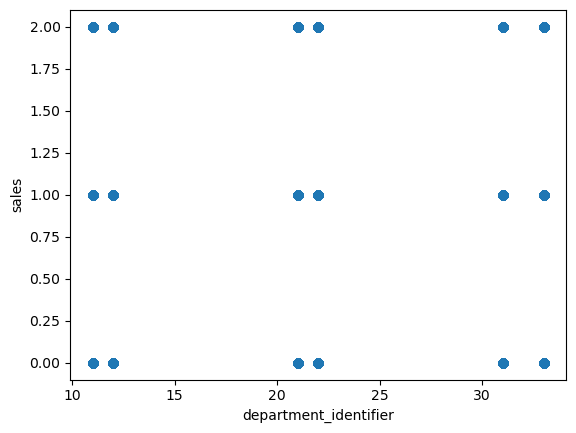

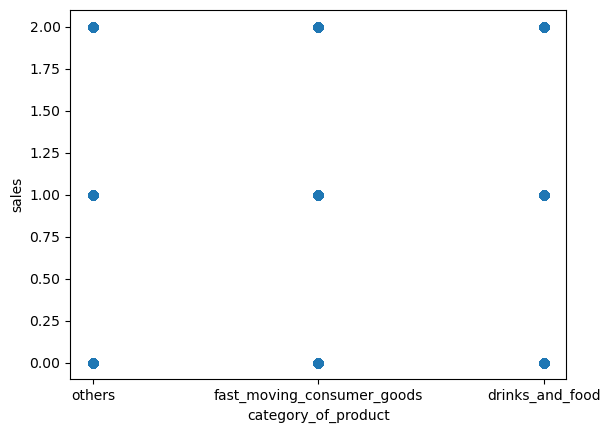

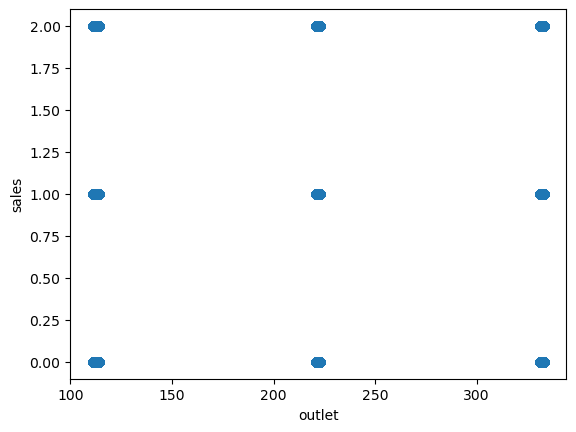

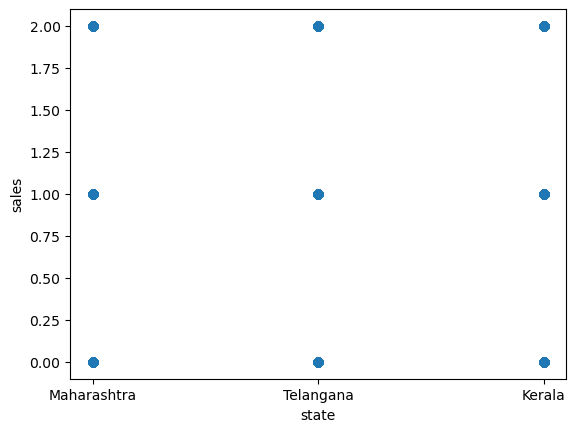

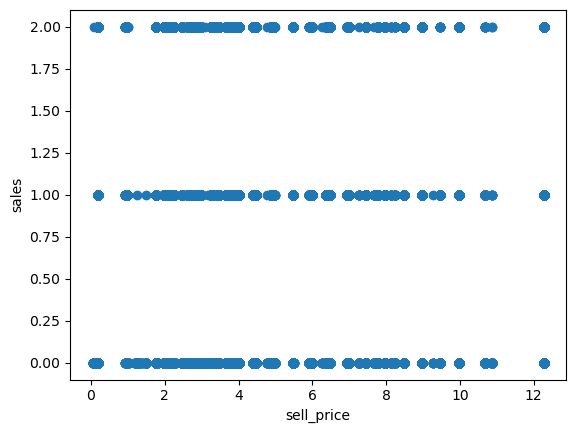

In [62]:
scatter(df, 'product_identifier')
scatter(df, 'department_identifier')
scatter(df, 'category_of_product')
scatter(df, 'outlet')
scatter(df, 'state')
scatter(df, 'sell_price')

### Data Cleaning 

In [63]:
df.isnull().sum()

date                         0
product_identifier       23700
department_identifier        0
category_of_product          0
outlet                       0
state                        0
sales                    54131
week_id                      0
sell_price                8018
dtype: int64

In [64]:
# dropping rows with null values

df = df.dropna(subset=['product_identifier', 'sales','sell_price'])

In [65]:
df.shape

(314497, 9)

#### Checking Correlation 

In [66]:
df.corr()

,product_identifier,department_identifier,outlet,sales,week_id,sell_price
product_identifier,1.000000,0.908598,0.003276,0.016299,-0.003045,-0.189045
department_identifier,0.908598,1.000000,0.008676,0.063195,0.002292,-0.290394
outlet,0.003276,0.008676,1.000000,-0.041699,0.000740,-0.012125
sales,0.016299,0.063195,-0.041699,1.000000,-0.018685,-0.141466
week_id,-0.003045,0.002292,0.000740,-0.018685,1.000000,-0.002079
sell_price,-0.189045,-0.290394,-0.012125,-0.141466,-0.002079,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'product_identifier'),
  Text(0, 1.5, 'department_identifier'),
  Text(0, 2.5, 'outlet'),
  Text(0, 3.5, 'sales'),
  Text(0, 4.5, 'week_id'),
  Text(0, 5.5, 'sell_price')])

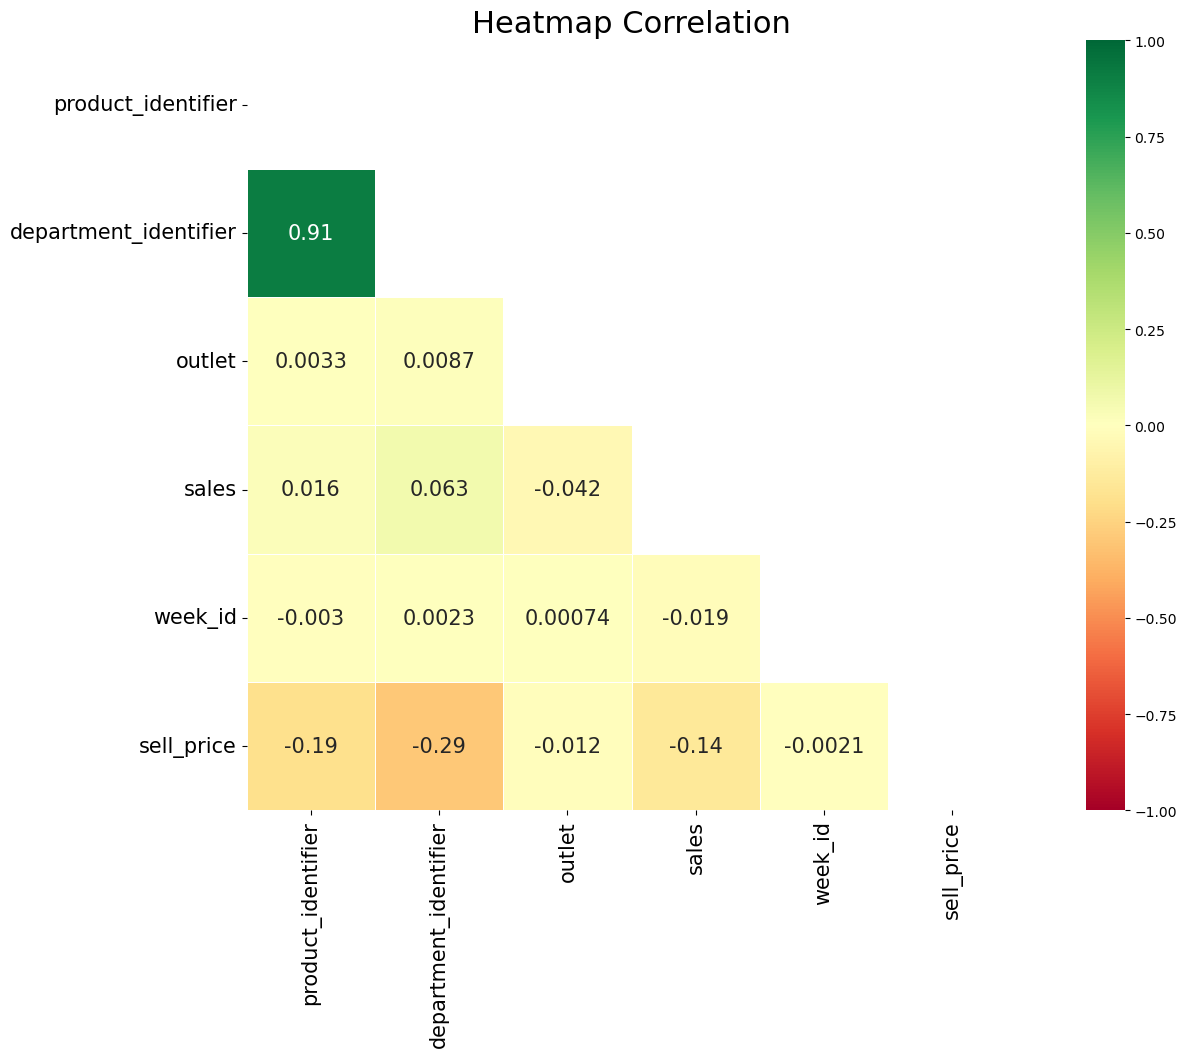

In [67]:
#Heatmap Correlation
import seaborn as sns
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

    From this visuals we can clearly see that product_identifier and department_identifier are highly correlated so we can delet any of the column.

In [68]:
# Deriving new feature called months from date column

df['Month'] = pd.to_datetime(df['date']).dt.month


In [69]:
df.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales', 'week_id',
       'sell_price', 'Month'],
      dtype='object')

In [70]:
df.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,Month
0,2012-01-01,74.0,11,others,111,Maharashtra,0.0,49,2.94,1
1,2012-01-01,337.0,11,others,111,Maharashtra,1.0,49,7.44,1
2,2012-01-01,423.0,12,others,111,Maharashtra,0.0,49,0.97,1
3,2012-01-01,432.0,12,others,111,Maharashtra,0.0,49,4.97,1
4,2012-01-01,581.0,21,fast_moving_consumer_goods,111,Maharashtra,0.0,49,4.88,1


In [71]:
# dropping unnecesary columns

df = df.drop(columns=["date","week_id","product_identifier"])

In [72]:
df.shape

(314497, 7)

In [73]:
df.head()

,department_identifier,category_of_product,outlet,state,sales,sell_price,Month
0,11,others,111,Maharashtra,0.0,2.94,1
1,11,others,111,Maharashtra,1.0,7.44,1
2,12,others,111,Maharashtra,0.0,0.97,1
3,12,others,111,Maharashtra,0.0,4.97,1
4,21,fast_moving_consumer_goods,111,Maharashtra,0.0,4.88,1


### Encoding categorical features to numerical 

In [74]:
df.dtypes

department_identifier       int64
category_of_product      category
outlet                      int64
state                    category
sales                     float64
sell_price                float64
Month                       int64
dtype: object

In [75]:
df['category_of_product'].nunique()

3

In [76]:
df['state'].nunique()

3

In [77]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'category_of_product'.

df['category_of_product']= label_encoder.fit_transform(df['category_of_product'])

# Encoding labels in state.

df['state']= label_encoder.fit_transform(df['state'])


In [78]:
df.sample(5)

,department_identifier,category_of_product,outlet,state,sales,sell_price,Month
317172,22,1,114,1,0.0,3.97,9
281976,22,1,333,0,1.0,9.97,7
41284,31,0,222,2,2.0,2.00,3
267458,21,1,333,0,0.0,4.47,6
368291,33,0,222,2,0.0,3.88,1


In [79]:
# Converting datatype from float to int og sales

df = df.astype({"sales":'int'}) 

In [80]:
df.dtypes

department_identifier      int64
category_of_product        int64
outlet                     int64
state                      int64
sales                      int64
sell_price               float64
Month                      int64
dtype: object

## Model Building  

### Splitting Dataset 

In [81]:
# Splitting the data into X,y
X = df.drop("sell_price",axis = 1)
Y = df["sell_price"].values.reshape(-1,1)

In [82]:
from sklearn.model_selection import train_test_split
# using the train test split function
X_train, X_test,Y_train, Y_test = train_test_split(X,Y ,random_state=104, test_size=0.25, shuffle=True)

### Feature Scaling 

In [83]:
##normalising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [84]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

### Model Deployment 

In [85]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [86]:
def get_accuracy(model_name):
    model         = model_name
    model.fit(X_train,Y_train)
    Y_pred_train  = model.predict(X_train)
    mse_train     = mean_squared_error(Y_train,Y_pred_train)
    mae_train     = mean_absolute_error(Y_train,Y_pred_train)
    r2score_train = r2_score(Y_train,Y_pred_train)*100
    
    Y_pred_test   = model.predict(X_test)
    mse_test      = mean_squared_error(Y_test,Y_pred_test)
    mae_test      = mean_absolute_error(Y_test,Y_pred_test)
    r2score_test = r2_score(Y_test,Y_pred_test)*100
    
    return print(f"mse_train {mse_train} \nmae_train {mae_train} \nr2score_train {r2score_train} \nmse_test {mse_test} \nmae_test {mae_test} \nr2score_test {r2score_test}")

In [87]:
for model_name,model in [("LinearRegression",LinearRegression()),("DecisionTreeRegressor",DecisionTreeRegressor()),("RandomForestRegressor",RandomForestRegressor()),("XGBRegressor",XGBRegressor()),("AdaBoostRegressor",AdaBoostRegressor()),("GradientBoostingRegressor",GradientBoostingRegressor())]:
    print(model_name)
    print(get_accuracy(model))
    print("*"*100)

LinearRegression
mse_train 5.171971753649231 
mae_train 1.7685825418972967 
r2score_train 12.544679844890606 
mse_test 5.148788917180045 
mae_test 1.7648673963299142 
r2score_test 12.559073409417055
None
****************************************************************************************************
DecisionTreeRegressor
mse_train 3.437005276802332 
mae_train 1.3863115968628543 
r2score_train 41.88204979165586 
mse_test 3.4604189746744702 
mae_test 1.3935883009847607 
r2score_test 41.232346789836406
None
****************************************************************************************************
RandomForestRegressor
mse_train 3.4373117208402117 
mae_train 1.3863929436981313 
r2score_train 41.87686798426809 
mse_test 3.460117071001242 
mae_test 1.3936391005762137 
r2score_test 41.237473963887005
None
****************************************************************************************************
XGBRegressor
mse_train 3.4463192271015743 
mae_train 1.3908381143143385 
r2